 # Анализ пользователей сервиса аренды самокатов

Нам передали данные о некоторых пользователях популярного сервиса аренды самокатов из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast используют мобильное приложение. 

Сервисом можно пользоваться:

* без подписки:
 * абонентская плата отсутствует;
 * стоимость одной минуты поездки — 8 рублей;
 * стоимость старта (начала поездки) — 50 рублей;
 
 
* с подпиской Ultra:
 * абонентская плата — 199 рублей в месяц;
 * стоимость одной минуты поездки — 6 рублей;
 * стоимость старта — бесплатно.


**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`
* **user_id**	-	уникальный идентификатор пользователя
* **name**	-	имя пользователя
* **age**	-	возраст
* **city**	-	город
* **subscription_type** -	тип подписки (free, ultra)

Поездки — `rides_go.csv`
* **user_id** -	уникальный идентификатор пользователя
* **distance** -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
* **duration** -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* **date** -	дата совершения поездки


Подписки — `subscriptions_go.csv`
* **subscription_type** -	тип подписки
* **minute_price** -	стоимость одной минуты поездки по данной подписке
* **start_ride_price** -	стоимость начала поездки
* **subscription_fee** -	стоимость ежемесячного платежа

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span><ul class="toc-item"><li><span><a href="#Считаем-CSV-файлы-с-данными-с-помощью-библиотеки-pandas-и-сохраним-их-в-датафреймы" data-toc-modified-id="Считаем-CSV-файлы-с-данными-с-помощью-библиотеки-pandas-и-сохраним-их-в-датафреймы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы</a></span></li><li><span><a href="#Выведим-первые-строки-каждого-набора-данных.-Изучим-общую-информацию-о-каждом-датафрейме." data-toc-modified-id="Выведим-первые-строки-каждого-набора-данных.-Изучим-общую-информацию-о-каждом-датафрейме.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.</a></span></li></ul></li><li><span><a href="#Выполним-предобработку-данных" data-toc-modified-id="Выполним-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выполним предобработку данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-за-какой-период-у-нас-данные." data-toc-modified-id="Проверим-за-какой-период-у-нас-данные.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим за какой период у нас данные.</a></span></li><li><span><a href="#Создадим-новый-столбец-с-номером-месяца-на-основе-столбца-date" data-toc-modified-id="Создадим-новый-столбец-с-номером-месяца-на-основе-столбца-date-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создадим новый столбец с номером месяца на основе столбца <code>date</code></a></span></li><li><span><a href="#Удалим-дубликаты-в-датафрейме-users" data-toc-modified-id="Удалим-дубликаты-в-датафрейме-users-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удалим дубликаты в датафрейме <code>users</code></a></span></li><li><span><a href="#Округлим-расстояния-в--rides['distance']-методом--round()" data-toc-modified-id="Округлим-расстояния-в--rides['distance']-методом--round()-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Округлим расстояния в  <code>rides['distance']</code> методом  <code>round()</code></a></span></li><li><span><a href="#Проверим-столбец-rides['duration']-на-предмет-наличия-аномалий." data-toc-modified-id="Проверим-столбец-rides['duration']-на-предмет-наличия-аномалий.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверим столбец <code>rides['duration']</code> на предмет наличия аномалий.</a></span></li></ul></li><li><span><a href="#Выполним-исследовательский-анализ-данных" data-toc-modified-id="Выполним-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выполним исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Частота-встречаемости-городов" data-toc-modified-id="Частота-встречаемости-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частота встречаемости городов</a></span></li><li><span><a href="#Соотношение-пользователей-с-подпиской-и-без-подписки" data-toc-modified-id="Соотношение-пользователей-с-подпиской-и-без-подписки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Соотношение пользователей с подпиской и без подписки</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Возраст пользователей</a></span></li><li><span><a href="#Расстояние,-которое-пользователь-преодолел-за-одну-поездку" data-toc-modified-id="Расстояние,-которое-пользователь-преодолел-за-одну-поездку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расстояние, которое пользователь преодолел за одну поездку</a></span></li><li><span><a href="#Продолжительность-поездок" data-toc-modified-id="Продолжительность-поездок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Продолжительность поездок</a></span></li></ul></li><li><span><a href="#Объединим-данные" data-toc-modified-id="Объединим-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединим данные</a></span><ul class="toc-item"><li><span><a href="#Объединим-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм-используя-метод-merge()" data-toc-modified-id="Объединим-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм-используя-метод-merge()-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объединим данные о пользователях, поездках и подписках в один датафрейм используя метод merge()</a></span></li><li><span><a href="#Создадим-датафрейм-c-данными-о-пользователях-без-подписки-из-датафрейма-full" data-toc-modified-id="Создадим-датафрейм-c-данными-о-пользователях-без-подписки-из-датафрейма-full-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создадим датафрейм c данными о пользователях без подписки из датафрейма <code>full</code></a></span></li><li><span><a href="#Создадим-датафрейм-c-данными-о-пользователях-с-подпиской-из-датафрейма-full" data-toc-modified-id="Создадим-датафрейм-c-данными-о-пользователях-с-подпиской-из-датафрейма-full-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создадим датафрейм c данными о пользователях с подпиской из датафрейма <code>full</code></a></span></li><li><span><a href="#Визуализируем-информацию-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий" data-toc-modified-id="Визуализируем-информацию-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий</a></span><ul class="toc-item"><li><span><a href="#Расстояние" data-toc-modified-id="Расстояние-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Расстояние</a></span></li><li><span><a href="#Время-поездок" data-toc-modified-id="Время-поездок-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Время поездок</a></span></li></ul></li></ul></li><li><span><a href="#Подсчитаем-выручку" data-toc-modified-id="Подсчитаем-выручку-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчитаем выручку</a></span><ul class="toc-item"><li><span><a href="#Создадим-датафрейм-с-агрегированными-данными-о-поездках-на-основе-датафрейма-с-объединёнными-данными-full" data-toc-modified-id="Создадим-датафрейм-с-агрегированными-данными-о-поездках-на-основе-датафрейма-с-объединёнными-данными-full-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными <code>full</code></a></span></li><li><span><a href="#В-этот-же-датафрейм-добавим-столбец-с-помесячной-выручкой,-которую-принёс-каждый-пользователь." data-toc-modified-id="В-этот-же-датафрейм-добавим-столбец-с-помесячной-выручкой,-которую-принёс-каждый-пользователь.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.</a></span></li></ul></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверим гипотезы</a></span><ul class="toc-item"><li><span><a href="#Пользователи-с-подпиской-тратят-больше-времени-на-поездки?-Если-да,-то-пользователи-с-подпиской-могут-быть-«выгоднее»-для-компании." data-toc-modified-id="Пользователи-с-подпиской-тратят-больше-времени-на-поездки?-Если-да,-то-пользователи-с-подпиской-могут-быть-«выгоднее»-для-компании.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Пользователи с подпиской тратят больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.</a></span></li><li><span><a href="#Расстояние-одной-поездки-в-3130-метров-—-оптимальное-с-точки-зрения-износа-самоката.-Можно-ли-сказать,-что-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?" data-toc-modified-id="Расстояние-одной-поездки-в-3130-метров-—-оптимальное-с-точки-зрения-износа-самоката.-Можно-ли-сказать,-что-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?</a></span></li><li><span><a href="#Помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки." data-toc-modified-id="Помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.</a></span></li><li><span><a href="#Представим-такую-ситуацию:-техническая-команда-сервиса-обновила-сервера,-с-которыми-взаимодействует-мобильное-приложение.-Она-надеется,-что-из-за-этого-количество-обращений-в-техподдержку-значимо-снизилось.-Некоторый-файл-содержит-для-каждого-пользователя-данные-о-количестве-обращений-до-обновления-и-после-него.-Какой-тест-нам-понадобился-бы-для-проверки-этой-гипотезы?" data-toc-modified-id="Представим-такую-ситуацию:-техническая-команда-сервиса-обновила-сервера,-с-которыми-взаимодействует-мобильное-приложение.-Она-надеется,-что-из-за-этого-количество-обращений-в-техподдержку-значимо-снизилось.-Некоторый-файл-содержит-для-каждого-пользователя-данные-о-количестве-обращений-до-обновления-и-после-него.-Какой-тест-нам-понадобился-бы-для-проверки-этой-гипотезы?-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?</a></span></li></ul></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span><ul class="toc-item"><li><span><a href="#Нужно-провести-акцию-с-раздачей-промокодов-на-один-бесплатный-месяц-подписки,-в-рамках-которой-как-минимум-100-существующих-клиентов-должны-продлить-эту-подписку.-То-есть-по-завершении-периода-действия-подписки-пользователь-может-либо-отказаться-от-неё,-либо-продлить,-совершив-соответствующий-платёж." data-toc-modified-id="Нужно-провести-акцию-с-раздачей-промокодов-на-один-бесплатный-месяц-подписки,-в-рамках-которой-как-минимум-100-существующих-клиентов-должны-продлить-эту-подписку.-То-есть-по-завершении-периода-действия-подписки-пользователь-может-либо-отказаться-от-неё,-либо-продлить,-совершив-соответствующий-платёж.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.</a></span></li><li><span><a href="#Отдел-маркетинга-рассылает-клиентам-push-уведомления-в-мобильном-приложении.-Клиенты-могут-открыть-его-или-не-открывать.-Известно,-что-уведомления-открывают-около-40-%-получивших-клиентов.-Отдел-планирует-разослать-1-млн-уведомлений.-С-помощью-аппроксимации-построим-примерный-график-распределения-и-оценим-вероятность-того,-что-уведомление-откроют-не-более-399,5-тыс.-пользователей." data-toc-modified-id="Отдел-маркетинга-рассылает-клиентам-push-уведомления-в-мобильном-приложении.-Клиенты-могут-открыть-его-или-не-открывать.-Известно,-что-уведомления-открывают-около-40-%-получивших-клиентов.-Отдел-планирует-разослать-1-млн-уведомлений.-С-помощью-аппроксимации-построим-примерный-график-распределения-и-оценим-вероятность-того,-что-уведомление-откроют-не-более-399,5-тыс.-пользователей.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Откроем файл с данными и изучим общую информацию

### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

Датафрейм из файла, расположенного по следующему пути: `/datasets/users_go.csv` или `https://code.s3.yandex.net/datasets/users_go.csv` сохраним в переменную `users`

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

Датафрейм из файла, расположенного по следующему пути: `/datasets/rides_go.csv` или `https://code.s3.yandex.net/datasets/rides_go.csv` сохраним в переменную `rides`

In [3]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])

Датафрейм из файла, расположенного по следующему пути: `/datasets/subscriptions_go.csv` или `https://code.s3.yandex.net/datasets/subscriptions_go.csv` сохраним в переменную `users_go`

In [4]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

Напишем функцию, которая будет выводить первые строки наших датафреймов, информацию о них, cписок характерных значений, о наличии дубликатов и пропущенных значений

In [5]:
def characteristics(df):
    print('------------- Исходный датафрейм -------------')
    display(df.head())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    display(df.info())
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(df.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(df.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(df.describe())

Применим функцию к датафрейму `users`

In [6]:
characteristics(users)

------------- Исходный датафрейм -------------


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

------------- Количество пустых значений в датафрейме -------------




user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


31



------------- Описательная статистика -------------


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Применим функцию к датафрейму `rides`

In [7]:
characteristics(rides)

------------- Исходный датафрейм -------------


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

------------- Количество пустых значений в датафрейме -------------




user_id     0
distance    0
duration    0
date        0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Применим функцию к датафрейму `subscriptions`

In [8]:
characteristics(subscriptions)

------------- Исходный датафрейм -------------


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

------------- Количество пустых значений в датафрейме -------------




subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


**Вывод**
* Датафреймы содержат:
 * `users` - 1565 строк
 * `rides` -  18068 строк
 * `subscriptions` - 2 строки
* В датафрейме `rides`, столбец `date` содержал тип данных `object`, при чтении файла привели его к типу данных `datetime`
* Пропущенные значения в датафреймах отсутствуют
* В датафрейме `users` обнаружен 31 дубликат, удалим их на этапе предобработки данных

## Выполним предобработку данных

### Проверим за какой период у нас данные.

In [9]:
left = rides['date'].min()
right = rides['date'].max()
print(f'У нас имеются данные за период с {left} по {right}')

У нас имеются данные за период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


### Создадим новый столбец с номером месяца на основе столбца `date`

In [10]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

Выведем для проверки первые строки датафрейма

In [11]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Удалим дубликаты в датафрейме `users`

В датафрейме `users` был обнаружен 31 дубликат, удалим их.

In [12]:
users = users.drop_duplicates().reset_index(drop=True)

Проверим наличие дубликатов в датафрейме `users`

In [13]:
users.duplicated().sum()

0

### Округлим расстояния в  `rides['distance'] ` методом  `round() ` 

In [14]:
rides['distance'] = rides['distance'].round()
rides

,user_id,distance,duration,date,month
0,1,4410.0,25.599769,2021-01-01,1
1,1,2618.0,15.816871,2021-01-18,1
2,1,754.0,6.232113,2021-04-20,4
3,1,2695.0,18.511000,2021-08-11,8
4,1,4029.0,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.0,19.822962,2021-11-04,11
18064,1534,2840.0,21.409799,2021-11-16,11
18065,1534,3826.0,18.435051,2021-11-18,11
18066,1534,2902.0,16.674362,2021-11-27,11


### Проверим столбец `rides['duration']` на предмет наличия аномалий.

In [15]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Большинство пользователей используют самокаты от 13 до 21 минуты, но встречаются и случаи кратковременного использования: 0.5 минуты, возможно, это ошибочные "старты", так же встречается и длительное использование: 40 минут, возможно, человек так долго использовал самокат.

**Вывод**
* У нас имеются данные за период с 2021-01-01 по 2021-12-30    
* Создали столбец `month` с номером месяца на основе столбца `date`
* В датафрейме `users` удалили 31 дубликат
* Округлили расстояния в `rides['distance']` для удобства восприятия данных
* Проверили столбец `rides['duration']` на наличие аномалий

## Выполним исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках

###  Частота встречаемости городов

Text(0, 0.5, 'Частота')

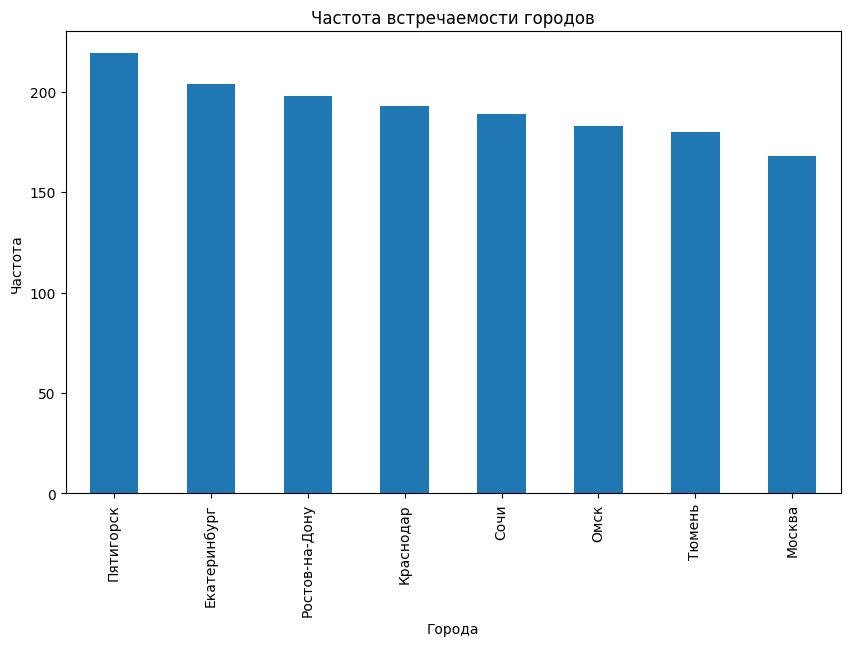

In [16]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
users['city'].value_counts().plot.bar()

# Добавляем подписи
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Частота')

Выведем количество пользователей по городам

In [17]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Большинство пользователей из Пятигорска, но в остальных городах пользователей не намного меньше.

### Соотношение пользователей с подпиской и без подписки

Text(0, 0.5, 'Частота')

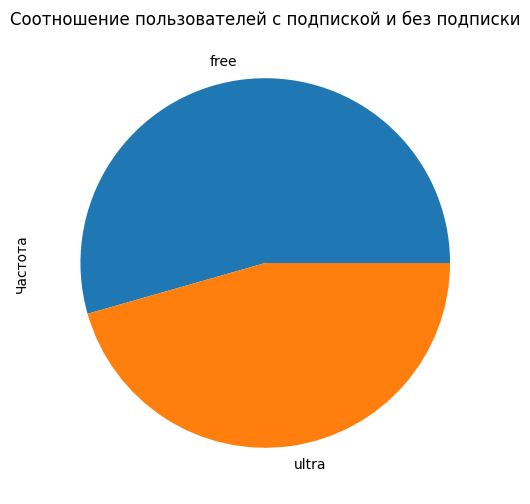

In [18]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
users['subscription_type'].value_counts().plot.pie()

# Добавляем подписи
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('Частота')

In [19]:
users['subscription_type'].value_counts(normalize=True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

Большинство пользователей пользуется подпиской free

### Возраст пользователей

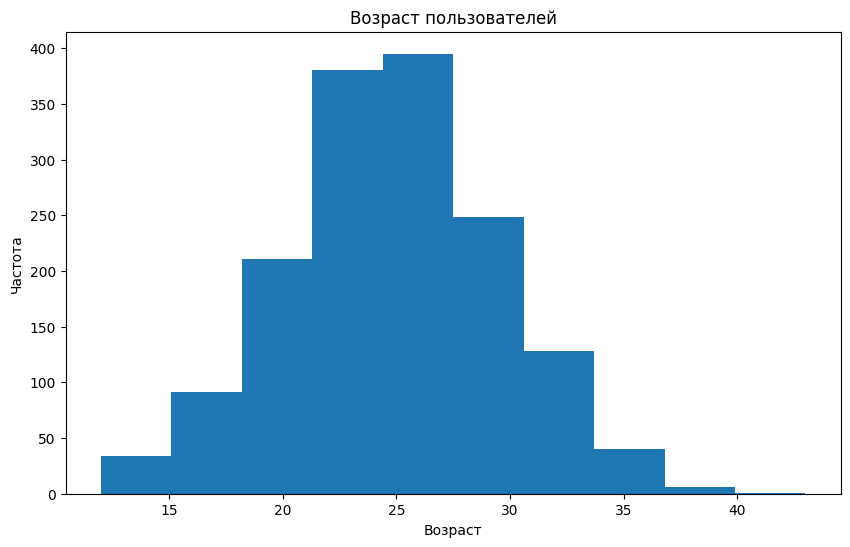

In [20]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму
plt.hist(users['age'])

# Добавляем подписи
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Показываем график
plt.show()

In [21]:
users['age'].describe() 

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Возраст пользователей имеет распределение близкое к нормальному, большинство пользователей возрастом около 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку

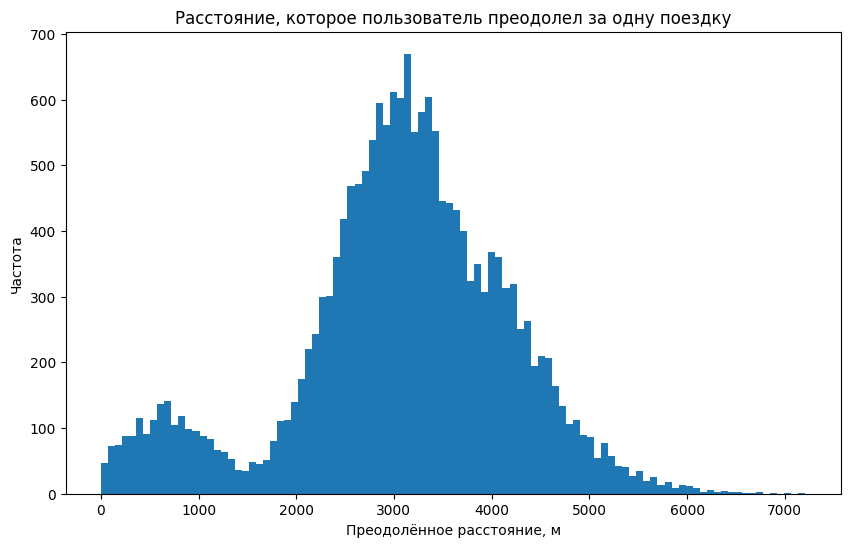

In [22]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму
plt.hist(rides['distance'], bins=100)

# Добавляем подписи
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Преодолённое расстояние, м')
plt.ylabel('Частота')

# Показываем график
plt.show()

In [23]:
rides['distance'].describe() 

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

Расстоение, которое пользователи преодолевают за одну поездку имеет распределение близкое к нормальному, с медианнымм значением 3133.6, но с всплеском в начале распределения на значении около 700. Большинство пользователей преодолевают расстояние от 2.5 км до 3.8 км

### Продолжительность поездок

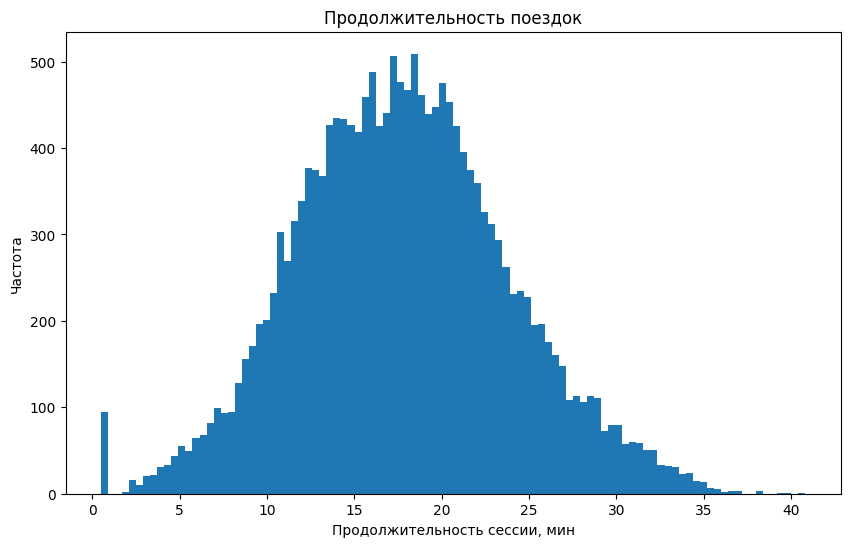

In [24]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму
plt.hist(rides['duration'], bins=100)

# Добавляем подписи
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность сессии, мин')
plt.ylabel('Частота')

# Показываем график
plt.show()

In [25]:
rides['duration'].describe() 

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Продолжительность поездок имеет распределение бликое к нормальному с медианным значением около 17 и с всплеском около 0. Большинство поездок продолжается от 13 до 22 минут

**Вывод**

Большинство пользователей сервиса аренды самокатов  GoFast из Пятигорска, но пользователи из других городов встречаются тоже достаточно часто, они чаще всего используют подписку free, их возраст около 22-28 лет, преодолевают в основном расстояние от 2.5 км до 3.8 км, а продолжительность поездки составляет от 13 до 22 минут.

## Объединим данные

### Объединим данные о пользователях, поездках и подписках в один датафрейм используя метод merge()

Посмотрим исходную размерность датасета `rides`

In [26]:
rides.shape

(18068, 5)

Выполним объединение датасетов `rides` и `users` по общему столбцу `user_id`

In [27]:
full = rides.merge(
    users,
    on='user_id',
    how='left'
)

Посмотрим размерность датасета `full`, после объединения датасетов

In [28]:
full.shape

(18068, 9)

Количество строк в датасетах до объединения и после совпало

Выполним объединение датасетов `full` и `subscriptions` по общему столбцу `subscription_type`

In [29]:
full = full.merge(
    subscriptions,
    on='subscription_type',
    how='left'
)

Посмотрим размерность датасета `full`, после объединения датасетов

In [30]:
full.shape

(18068, 12)

Количество строк в датасетах до объединения и после совпало

Проверим наличие пропусков в объединенном датасете

In [31]:
full.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутствуют

### Создадим датафрейм c данными о пользователях без подписки из датафрейма `full`

In [32]:
users_without_subscriptions = full.query('subscription_type in "free"')
users_without_subscriptions.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2516.0,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,847.0,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.0,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1206.0,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.0,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


### Создадим датафрейм c данными о пользователях с подпиской из датафрейма `full`

In [33]:
users_with_subscriptions = full.query('subscription_type in "ultra"')
users_with_subscriptions.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410.0,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618.0,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.0,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695.0,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029.0,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

#### Расстояние

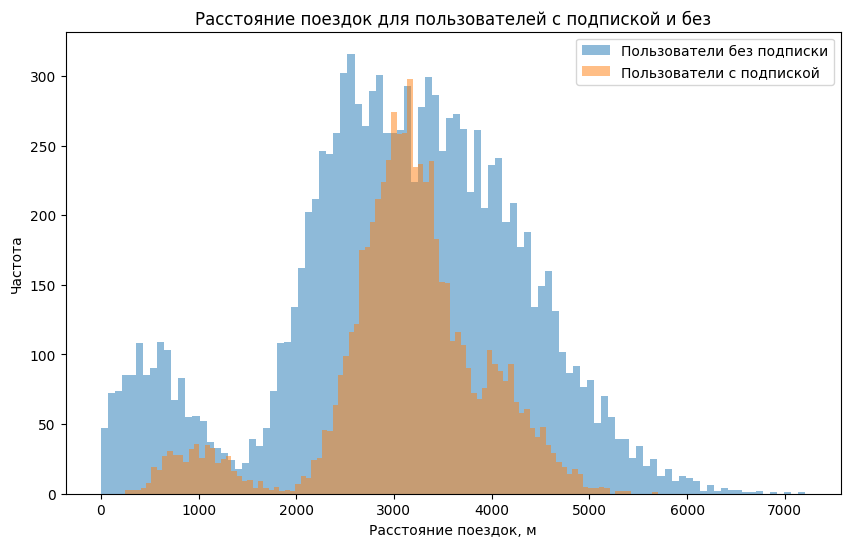

In [34]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для users_without_subscriptions
plt.hist(users_without_subscriptions['distance'], bins=100, alpha=0.5, label='Пользователи без подписки')

# Строим гистограмму для users_with_subscriptions
plt.hist(users_with_subscriptions['distance'], bins=100, alpha=0.5, label='Пользователи с подпиской')

# Добавляем подписи
plt.title('Расстояние поездок для пользователей с подпиской и без')
plt.xlabel('Расстояние поездок, м')
plt.ylabel('Частота')

# Добавляем легенду
plt.legend()

# Показываем график
plt.show()

Пользователи без подписки часто используют самокат на короткое расстояние до 1 км, но большая часть пользователей использует самокат для поездок от 2 до 5 км. Пользователи с подпиской чаще используют самокат на короткое расстояние от 500 м до 1,5 км, но большая часть пользователей использует самокат для поездок от 2,5 до 4,5 км.

#### Время поездок

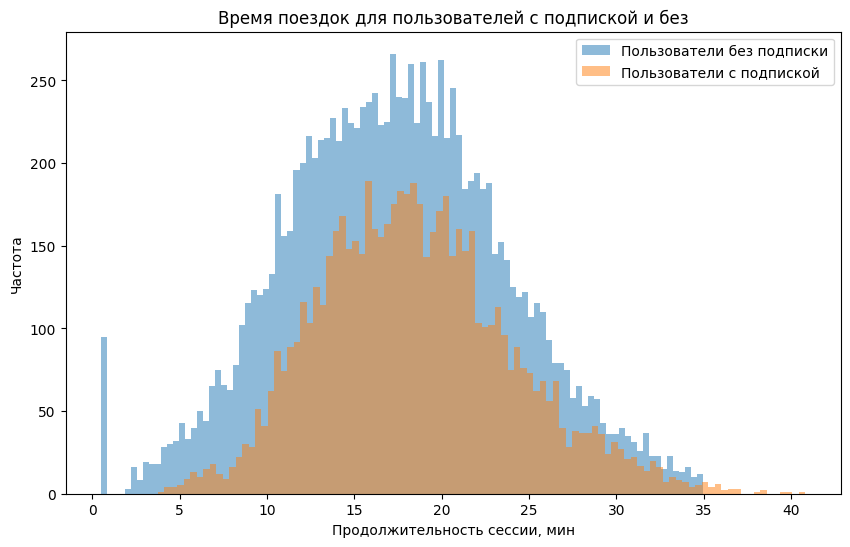

In [35]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму для users_without_subscriptions
plt.hist(users_without_subscriptions['duration'], bins=100, alpha=0.5, label='Пользователи без подписки')

# Строим гистограмму для users_with_subscriptions
plt.hist(users_with_subscriptions['duration'], bins=100, alpha=0.5, label='Пользователи с подпиской')

# Добавляем подписи
plt.title('Время поездок для пользователей с подпиской и без')
plt.xlabel('Продолжительность сессии, мин')
plt.ylabel('Частота')

# Добавляем легенду
plt.legend()

# Показываем график
plt.show()

Пользователи с подпиской и без неё чаще всего используют самокат примерно от 10 до 27 минут. У пользователей без подписки на графике есть всплеск около 0, возможно, это случайные "старты" из-за неопытности пользователей.

**Вывод**

* Мы объеденили данные о пользователях, поездках и подписках в один датафрейм и создали отдельные датафреймы с пользователями с подпиской и без.

* Пользователи с подпиской и без неё чаще всего используют самокат на короткое расстояние около 1 км, но большая часть пользователей использует самокат для поездок от 2,5 до 4,5 км. примерно от 10 до 27 минут. У пользователей без подписки на графике есть всплеск около 0, возможно, это случайные "старты" из-за неопытности пользователей.

* По графику мы можем увидеть, что пользователи без подписки чаще пользуются самокатами, что можно подтвердить соотношением пользователей с подпиской и без, которое мы посчитали ранее. 

* Распределение расстояния и времени поездкок схожи, т.к. это взаимосвязанные переменные.

## Подсчитаем выручку

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными `full`

Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [36]:
# Создадим датафрейм с группировкой по 'user_id' и 'month' и применим агрегирующие функции
revenue = full.groupby(['user_id', 'month']).agg({
    'distance': ['sum', 'count'],  # Суммируем расстояние и считаем количество поездок для каждого пользователя за каждый месяц
    'duration': 'sum'  # Суммируем время поездок для каждого пользователя за каждый месяц
}).reset_index()

# Переименуем столбцы
revenue.columns = ['user_id', 'month', 'total_distance', 'trip_count', 'total_duration']

# Выведим результат
revenue.head()


,user_id,month,total_distance,trip_count,total_duration
0,1,1,7028.0,2,41.416640
1,1,4,754.0,1,6.232113
2,1,8,6724.0,2,44.776802
3,1,10,5810.0,2,31.578017
4,1,11,7004.0,3,53.397424


### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

Обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

Напишем функцию для создания столбцов с помесячной выручкой и типом подписки и добавим их в датасет

In [37]:
def cost_of_travel(row):
    # Каждое значение из столбца duration округлим с помощью «потолка»: 
    row['duration'] = np.ceil(row['duration'])
    # Создадим датафрейм с группировкой по 'user_id' и 'month' и применим агрегирующие функции
    row = full.groupby(['user_id', 'month']).agg({
        'duration': ['sum', 'count'],  # Суммируем время и количество поездок для каждого пользователя за каждый месяц
        'minute_price': 'mean',
        'start_ride_price': 'mean',
        'subscription_fee': 'mean',
        'subscription_type': 'min'
    }).reset_index()

    # Переименуем столбцы
    row.columns = ['user_id', 'month', 'duration_sum', 'duration_count', 'minute_price', 'start_ride_price',  'subscription_fee', 'subscription_type']
    row['cost_of_travel'] = row['duration_sum']*row['minute_price']+ row['duration_count']*row['start_ride_price']+row['subscription_fee']
    # Выведим результат
    return row[['cost_of_travel','subscription_type']]


Применим эту функцию к нашему датафрейму

In [38]:
revenue[['monthly_revenue', 'subscription_type']] = cost_of_travel(full)
revenue.head()

,user_id,month,total_distance,trip_count,total_duration,monthly_revenue,subscription_type
0,1,1,7028.0,2,41.416640,451.0,ultra
1,1,4,754.0,1,6.232113,241.0,ultra
2,1,8,6724.0,2,44.776802,475.0,ultra
3,1,10,5810.0,2,31.578017,391.0,ultra
4,1,11,7004.0,3,53.397424,535.0,ultra


**Вывод**

Мы создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными full и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

## Проверим гипотезы

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Пользователи с подпиской тратят больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Сформулируем гипотезы:
* $H_0$ - пользователи с подпиской тратят столько же времени на поездки сколько и пользователи без подписки
* $H_1$ - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

Выберем уровень статистической значимости равный 5%

In [39]:
alpha = 0.01

Применим двухвыборочный t-тест для независимых выборок. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [40]:
results = st.ttest_ind(
    users_with_subscriptions['duration'], 
    users_without_subscriptions['duration'], 
    alternative='greater'
)
results.pvalue

1.2804098316645618e-34

Вывод об отвержении или неотвержении нулевой гипотезы

In [41]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской, вероятно, тратят больше времени на поездки, они могут быть "выгоднее" для компании')
else:
    print('Не отвергаем нулевую гипотезу: Нет статистически значимых различий во времени поездок между пользователями с и без подписки') 

Отвергаем нулевую гипотезу: Пользователи с подпиской, вероятно, тратят больше времени на поездки, они могут быть "выгоднее" для компании


### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем гипотезы:
* $H_0$ - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку: 3130 метров
* $H_1$ - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров

Применим одновыборочный t-тест

In [42]:
value = 3130
results = st.ttest_1samp(
    users_with_subscriptions['distance'],
    value,
    alternative='greater'
)
results.pvalue

0.9195649894697724

Вывод об отвержении или неотвержении нулевой гипотезы

In [43]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Среднее расстояние, вероятно, превышает 3130 метров.')
else:
    print('Не отвергаем нулевую гипотезу. Среднее расстояние, вероятно, не превышает 3130 метров.')

Не отвергаем нулевую гипотезу. Среднее расстояние, вероятно, не превышает 3130 метров.


### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформулируем гипотезы:
* $H_0$ - помесячная выручка от пользователей с подпиской и без подписки одинаковая
* $H_1$ - помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки

Cоздадим два новых датасета с помесячной выручкой для пользователей с подпиской и без.

In [44]:
revenue_with_subscriptions = revenue.query('subscription_type in "ultra"')
revenue_without_subscriptions = revenue.query('subscription_type in "free"')

Применим двухвыборочный t-тест для независимых выборок. Используем данные из полученных датасетов с помесячной выручкой, которую принёс каждый пользователь, отдельно для подписчиков и тех, у кого нет подписки.

In [45]:
results = st.ttest_ind(
    revenue_with_subscriptions['monthly_revenue'], 
    revenue_without_subscriptions['monthly_revenue'], 
    alternative='greater'
)
results.pvalue

1.8850394384715216e-31

Вывод об отвержении или неотвержении нулевой гипотезы

In [46]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской, вероятно, выше, чем от пользователей без подписки.')
else:
    print('Не отвергаем нулевую гипотезу. Нет доказательств того, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.')

Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской, вероятно, выше, чем от пользователей без подписки.


**Проверили гипотезы и сделали выводы:**
1. Пользователи с подпиской тратят больше времени на поездки? Отвергли нулевую гипотезу, вероятно, пользователи с подпиской тратят больше времени на поездки, они могут быть "выгоднее" для компании.
2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Не отвергли нулевую гипотезу. Среднее расстояние не превышает 3130 метров — оптимальное с точки зрения износа самоката. 
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Отвергли нулевую гипотезу, помесячная выручка от пользователей с подпиской, вероятно, выше, чем от пользователей без подписки.

### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезы нам бы понадобился двухвыборочный t-тест для зависимых выборок `st.ttest_rel`, с левосторонней проверкой (значение аргумента `alternative: 'less'`).

## Распределения

### Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей.

Наши данные можно представить биномиальным распределением, так как у нас есть два возможных исхода: пользователь продлевает подписку или нет. Посчитаем вероятность для распределения случайной величины от 100 до 2000 с шагом 1, построим график кумулятивной функции распределения и найдём минимальное значение количества промокодов, которых нужно разослать, при котором вероятность не выполнить план будет менее 5%

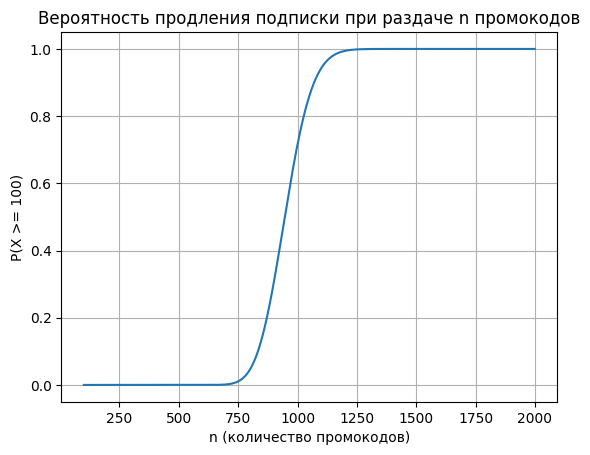

Минимальное количество промокодов: 1107


In [47]:
# Функция для расчета вероятности P(X >= 100)
def probability_at_least_100(n, p):
    return 1 - st.binom.cdf(94, n, p)

# График для визуализации изменения вероятности
n_values = list(range(100, 2000, 1)) # Проверяем значения от 100 до 2000 с шагом 1
probabilities = [probability_at_least_100(n, 0.1) for n in n_values]

plt.plot(n_values, probabilities)
plt.xlabel('n (количество промокодов)')
plt.ylabel('P(X >= 100)')
plt.title('Вероятность продления подписки при раздаче n промокодов')
plt.grid(True)
plt.show()

# Найдем минимальное n, при котором P(X >= 100) >= 0.95
min_n = None
for i in range(len(n_values)):
    if probabilities[i] >= 0.95:
        min_n = n_values[i]
        break
        
if min_n is not None:
    print(f"Минимальное количество промокодов: {min_n}")
else:
    print("Не найдено подходящего количества промокодов.")

**Вывод**

Для того, чтобы минимум 100 существующих клиентов продлили подписку, с вероятностью не выполнить план, примерно 5%, нужно разослать минимум 1107 промокодов.

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Зададим функцию, которая выдаёт `num` чисел, равномерно распределённых от `start` до `stop`

In [48]:
def linspace(start, stop, num) :
    step = (stop - start) / (num - 1)
    result = []
    for i in range (num):
        result.append (start + step * i)
    return result

Зададим параметры распределения

In [49]:
# количество независимых повторений
n = 1000000
# вероятность успеха
p = 0.4
# математическое ожидание
mu = n * p
# стандартное отклонение
sigma = np.sqrt(n * p * (1 - p))

Зададим границы промежутка, на котором будем строить график: mu +/- 4 sigma

In [50]:
left = mu - 4 * sigma
right = mu + 4 * sigma

Построим график от `left` до `right`

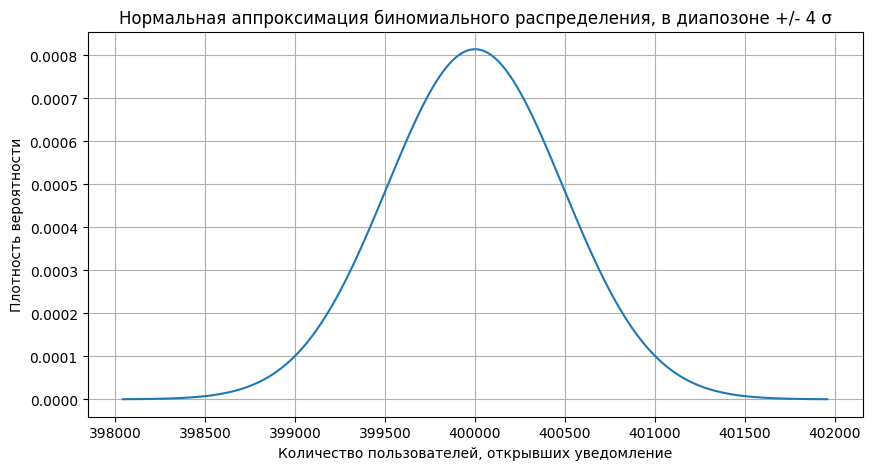

In [51]:
# получим список из чисел от left до right
x = linspace(left, right, 100000)
y = st.norm.pdf(x, mu, sigma)

# отобразим график распределения
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel('Количество пользователей, открывших уведомление')
plt.ylabel('Плотность вероятности')
plt.title('Нормальная аппроксимация биномиального распределения, в диапозоне +/- 4 σ')
plt.grid(True)
plt.show()

Оценим вероятность того, что уведомление откроют не более 399.5 тысяч пользователей

In [52]:
successes = 399500
print(f"Вероятность того, что уведомления откроют не более {successes} пользователей: {st.norm.cdf(successes, mu, sigma)}")

Вероятность того, что уведомления откроют не более 399500 пользователей: 0.15371708296369768


**Вывод**

С вероятностью 15% уведомления откроют не более 399,5 тыс. пользователей

## Вывод

* Исследовав наши датасеты, мы обнаружили, что:
 * `users` - 1565 строк;
 * `rides` -  18068 строк, столбец `date` содержит тип данных `object`;
 * `subscriptions` - 2 строки.
* В датафрейме `rides`, столбец `date` содержал тип данных `object`, при чтении файла привели его к типу данных `datetime`
* Пропущенные значения в датафреймах отсутствуют
* В датафрейме `users` обнаружен 31 дубликат, удалим их на этапе предобработки данных
* У нас имеются данные за период с 2021-01-01 по 2021-12-30 

* На этапе обработки данных мы создали столбец `month` с номером месяца на основе столбца `date` и в датафрейме `users` удалили 31 дубликат.
* Округлили расстояния в `rides['distance']` для удобства восприятия данных
* Проверили столбец `rides['duration']` на наличие аномалий

* Выполнили исследовательский анализ данных и выяснили, что большинство пользователей сервиса аренды самокатов GoFast из Пятигорска, но пользователи из других городов встречаются тоже достаточно часто, они чаще всего используют бесплатную подписку, их возраст около 22-28 лет, преодолевают в основном расстояние от 2.5 км до 3.8 км, а продолжительность поездки составляет от 13 до 22 минут.

* Объеденили данные о пользователях, поездках и подписках в один датафрейм и создали отдельные датафреймы с пользователями с подпиской и без. Построили визуализации и сделали выводы, что пользователи с подпиской и без неё чаще всего используют самокат на короткое расстояние около 1 км, но большая часть пользователей использует самокат для поездок от 2,5 до 4,5 км. примерно от 10 до 27 минут. У пользователей без подписки на графике есть всплеск около 0, возможно, это случайные "старты" из-за неопытности пользователей.


* Посчитали помесячную выручку, которую принёс каждый пользователь, агрегировав данные о поездках, посчитали суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


* Проверили гипотезы и сделали выводы:
 1. Пользователи с подпиской тратят больше времени на поездки? Отвергли нулевую гипотезу, вероятно, пользователи с подпиской тратят больше времени на поездки, они могут быть "выгоднее" для компании.
 2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Не отвергли нулевую гипотезу. Среднее расстояние не превышает 3130 метров — оптимальное с точки зрения износа самоката. 
 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Отвергли нулевую гипотезу, помесячная выручка от пользователей с подпиской, вероятно, выше, чем от пользователей без подписки.


* Выяснили, что для того, чтобы минимум 100 существующих клиентов продлили подписку, с вероятностью не выполнить план, примерно 5%, нужно раздать минимум 1107 промокодов.


* Выяснили, что с вероятностью 15% при рассылке 1 млн push-уведомления в мобильном приложении уведомления откроют не более 399,5 тыс. пользователей.

**Рекомендация рекламному отделу:** пользователи с подпиской тратят больше времени на поездки и помесячная выручка от них выше, чем от пользователей без подписки, поэтому стоит продвигать платную подписку